Linear Regression between Property Value and Income

For 2020 HMDA data.

In [3]:
import pandas as pd
import numpy as np
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots

In [5]:
df = pd.read_csv('ML and HMDA.csv')
df

Unnamed: 0  Ca_Num         CA_Name applicant_race-1  \
0                0     311      North Cook          4 White   
1                1    1970            Will          4 White   
2                2       9     Edison Park          4 White   
3                3     430          DuPage   5 Not Reported   
4                4      77       Edgewater   5 Not Reported   
...            ...     ...             ...              ...   
634240      634240     315      South Cook   5 Not Reported   
634241      634241       5    North Center          1 Asian   
634242      634242      58   Brighton Park          4 White   
634243      634243      68       Englewood   5 Not Reported   
634244      634244     312  Northwest Cook          1 Asian   

       applicant_ethnicity-1  action_taken  occupancy_type  loan_amount  \
0               2 Not Latinx             4               1     325000.0   
1               2 Not Latinx             1               1     235000.0   
2               2 Not Latinx             1               1     355000.0   
3             3 Not Reported             1               1     585000.0   
4             3 Not Reported             5               1     445000.0   
...                      ...           ...             ...          ...   
634240        3 Not Reported             6               1      55000.0   
634241          2 Not Latinx             1               1     265000.0   
634242              1 latinx             1               1     165000.0   
634243        3 Not Reported             1               3     135000.0   
634244          2 Not Latinx             5               1      65000.0   

       property_value debt_to_income_ratio loan_to_value_ratio  \
0                 NaN                  NaN                 NaN   
1              355000                 <20%              66.616   
2              445000             20%-<30%                80.0   
3              655000                   42                90.0   
4                 NaN                  NaN                 NaN   
...               ...                  ...                 ...   
634240          65000                  NaN                 NaN   
634241         425000             20%-<30%              61.905   
634242         225000                   42              75.244   
634243       195000.0                  NaN                 NaN   
634244            NaN                  NaN                 NaN   

        ffiec_msa_md_median_family_income  \
0                                   84800   
1                                   84800   
2                                   84800   
3                                   84800   
4                                   84800   
...                                   ...   
634240                              84800   
634241                              84800   
634242                              84800   
634243                              84800   
634244                              84800   

                                    respondent_name  \
0                                     Commerce Bank   
1                                     Commerce Bank   
2                                     Commerce Bank   
3                                     Commerce Bank   
4                                     Commerce Bank   
...                                             ...   
634240                      A+ Federal Credit Union   
634241  Warsaw Federal Savings and Loan Association   
634242                       Landmark National Bank   
634243                          CALCAP Lending, LLC   
634244                 SOUTHWEST STAGE FUNDING, LLC   

                   topholder_name  Income Numerical  
0       COMMERCE BANCSHARES, INC.             181.0  
1       COMMERCE BANCSHARES, INC.             250.0  
2       COMMERCE BANCSHARES, INC.             223.0  
3       COMMERCE BANCSHARES, INC.             301.0  
4       COMMERCE BANCSHARES, INC.             180.0  
...                           .

In [200]:
def linear_regression_descriptive(table, x, y):
    xval = table[x]
    yval= table[y]
    
    def correlation(table, x, y):
        def standard_units(z):
            """Converts an array x to standard units"""
            return (z - np.mean(z)) / np.std(z)
        x_su = standard_units(x)
        y_su = standard_units(y)
        return np.mean(x_su * y_su)
    correlation = correlation(table, xval, yval)
    
    def slope_econ(table, x_column, y_column):
        xi = table[x_column]
        yi = table[y_column]
        xbar = np.average(xi)
        ybar = np.average(yi)
        return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)
    slope = slope_econ(table, x, y)
    
    def intercept(table, x_column, y_column):
        xi = table[x_column]
        yi = table[y_column]
        xbar = np.average(xi)
        ybar = np.average(yi)
        def slope_econ(table, x_column, y_column):
            return np.sum((xi-xbar)*(yi-ybar)) / np.sum((xi-xbar)**2)
        slope = slope_econ(table, x_column, y_column)
        intercept = np.average(yi-slope*xbar)
        return intercept
    intercept = intercept(table,x,y)
    
    predicted = intercept + slope*xval
    residuals = yval - predicted
    MRSE = np.sqrt(np.mean(residuals**2))
    
    predicted_table1 = table.copy()
    predicted_table1['predicted'] = predicted
    predicted_table = predicted_table1.copy()
    predicted_table['residuals'] = residuals
    
    #Prints the estimated regression line.
    print('Predicted y Value =', slope, 'x', '+', intercept)
    print('r =', correlation)
    print('MRSE =', MRSE)
    
    #Shows the predicted data as a line and scatters the actual points.
    plots.plot(table[x], predicted_table['predicted'])
    plots.scatter(predicted_table[x], predicted_table[y], alpha = .1);
    plots.title('Best Fit Line for Compared Data')
    plots.xlabel(x)
    plots.ylabel(y)
    plots.show();
    #Create a scatter plot that shows the residuals around the best fit line.
    #This is to visually look to see if there is a clustered pattern.
    #This is also to visually check to see how clustered the residuals are around the best fit.
    xlims = make_array(min(xval), max(xval))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4); 
    plots.scatter(predicted_table[x], predicted_table['residuals'], alpha = .1);
    plots.title('Residual Plot of Compared Data')
    plots.xlabel(x)
    plots.ylabel('residuals')
    plots.show();
    
    return predicted_table[:5]

In [201]:
new = df.copy().dropna().replace('Exempt', 0)
new['property_value'] = new['property_value'].astype(float)

#remove outliers
df2 = new.loc[new['property_value'] > 100]
df3 = df2.loc[new['property_value'] < 20005000]
df4 = df3.loc[new['Income Numerical'] < 15000.0]
df5 = df4.loc[new['Income Numerical'] > 0]


df5 = df5.sort_values(by = ['Income Numerical'], ascending = False)
df5[['property_value', 'Income Numerical']]

property_value  Income Numerical
212584       3975000.0           12285.0
185390        725000.0           11214.0
170691       5005000.0           10967.0
467448        715000.0           10966.0
623119        255000.0            9999.0
...                ...               ...
155479        205000.0               1.0
480015        225000.0               1.0
363975        525000.0               1.0
252138        125000.0               1.0
531328        225000.0               1.0

[387972 rows x 2 columns]

Predicted y Value = 1032.0240434495797 x + 254439.11881503643
r = 0.5573262149604216
MRSE = 250669.04937161494


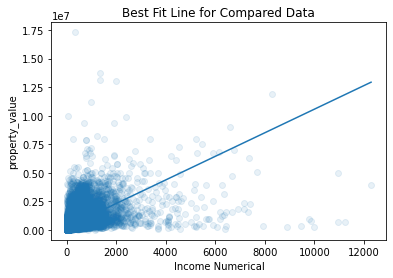

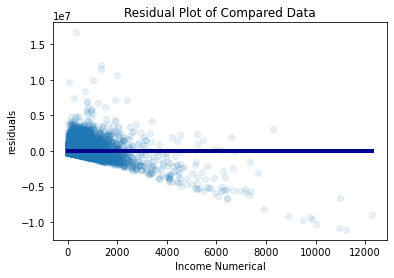

Unnamed: 0  Ca_Num         CA_Name applicant_race-1  \
212584      212584     970            Lake   5 Not Reported   
185390      185390       7    Lincoln Park          4 White   
170691      170691     970            Lake   5 Not Reported   
467448      467448       7    Lincoln Park   5 Not Reported   
623119      623119      33  Near South Sid          1 Asian   

       applicant_ethnicity-1  action_taken  occupancy_type  loan_amount  \
212584        3 Not Reported             1               2    3185000.0   
185390          2 Not Latinx             1               1     505000.0   
170691        3 Not Reported             1               1    3755000.0   
467448        3 Not Reported             1               2     485000.0   
623119          2 Not Latinx             1               2     105000.0   

        property_value debt_to_income_ratio loan_to_value_ratio  \
212584       3975000.0                 <20%                80.0   
185390        725000.0                 <20%               68.97   
170691       5005000.0                 <20%                75.0   
467448        715000.0                 <20%              67.741   
623119        255000.0             20%-<30%              42.545   

        ffiec_msa_md_median_family_income  \
212584                             103400   
185390                              84800   
170691                             103400   
467448                              84800   
623119                              84800   

                                  respondent_name        topholder_name  \
212584             Citibank, National Association        CITIGROUP INC.   
185390  JPMorgan Chase Bank, National Association  JPMORGAN CHASE & CO.   
170691  JPMorgan Chase Bank, National Association  JPMORGAN CHASE & CO.   
467448                      GUARANTEED RATE, INC.                    -1   
623119               CIS Financial Services, Inc.                    -1   

        Income Numerical     predicted     residuals  
212584           12285.0  1.293285e+07 -8.957854e+06  
185390           11214.0  1.182756e+07 -1.110256e+07  
170691           10967.0  1.157265e+07 -6.567647e+06  
467448           10966.0  1.157161e+07 -1.085661e+07  
623119            9999.0  1.057365e+07 -1.031865e+07

In [202]:
linear_regression_descriptive(df5, 'Income Numerical','property_value')

The outcome showed some correlation. The residual plot shows some a clear pattern. Therefore, linear regression might not be the best fit.
I will try to take the log of X and see if logarithmic linear regression will work better.

In [203]:
df6 = df5.copy()
#Find the log of Y and plot.
df6['Income Numerical'] = np.log(df5['Income Numerical'])
df7 = df6.dropna()

# Logarithmic Linear Regression

Predicted y Value = 270964.55591712904 x + -873112.3622299483
r = 0.5918356993237898
MRSE = 243352.40555286515


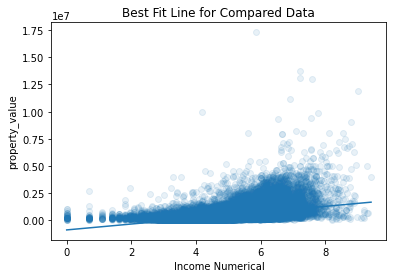

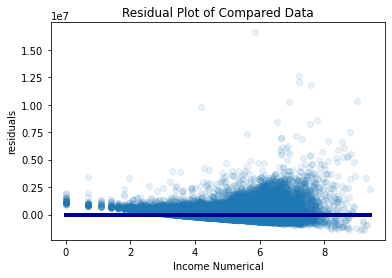

Unnamed: 0  Ca_Num         CA_Name applicant_race-1  \
212584      212584     970            Lake   5 Not Reported   
185390      185390       7    Lincoln Park          4 White   
170691      170691     970            Lake   5 Not Reported   
467448      467448       7    Lincoln Park   5 Not Reported   
623119      623119      33  Near South Sid          1 Asian   

       applicant_ethnicity-1  action_taken  occupancy_type  loan_amount  \
212584        3 Not Reported             1               2    3185000.0   
185390          2 Not Latinx             1               1     505000.0   
170691        3 Not Reported             1               1    3755000.0   
467448        3 Not Reported             1               2     485000.0   
623119          2 Not Latinx             1               2     105000.0   

        property_value debt_to_income_ratio loan_to_value_ratio  \
212584       3975000.0                 <20%                80.0   
185390        725000.0                 <20%               68.97   
170691       5005000.0                 <20%                75.0   
467448        715000.0                 <20%              67.741   
623119        255000.0             20%-<30%              42.545   

        ffiec_msa_md_median_family_income  \
212584                             103400   
185390                              84800   
170691                             103400   
467448                              84800   
623119                              84800   

                                  respondent_name        topholder_name  \
212584             Citibank, National Association        CITIGROUP INC.   
185390  JPMorgan Chase Bank, National Association  JPMORGAN CHASE & CO.   
170691  JPMorgan Chase Bank, National Association  JPMORGAN CHASE & CO.   
467448                      GUARANTEED RATE, INC.                    -1   
623119               CIS Financial Services, Inc.                    -1   

        Income Numerical     predicted     residuals  
212584          9.416134  1.678326e+06  2.296674e+06  
185390          9.324918  1.653610e+06 -9.286100e+05  
170691          9.302646  1.647575e+06  3.357425e+06  
467448          9.302555  1.647550e+06 -9.325503e+05  
623119          9.210240  1.622536e+06 -1.367536e+06

In [204]:
linear_regression_descriptive(df7, 'Income Numerical','property_value')

Correlation increased slightly and the residual plot looked better with logarithmic LR than it did with simple LR. 